# Topic 9: The short run

This lecture provides graphs on the section on short run fluctuations.

In [1]:
# load definitions
%matplotlib inline
from defs_intermediate_macro import *
%run defs_intermediate_macro

# GDP

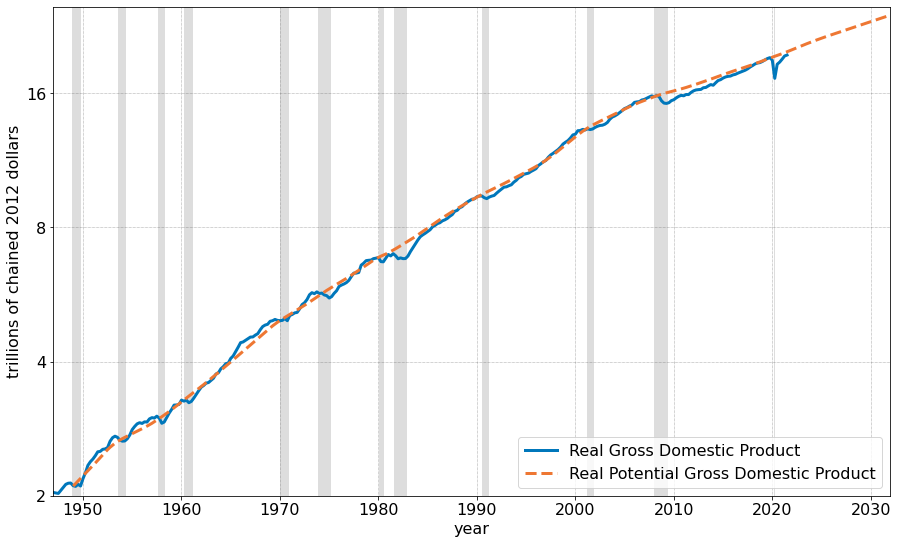

In [2]:
# GDP and potential GDP since 1947
data = myLoadDataFRED(series=['GDPC1','GDPPOT'],transform='none')

# saving rate graph
param = {'title': '',
         'xlim': [1947,2032], 'ylim': [2,25],
         'xlabel': 'year', 'ylabel': 'trillions of chained 2012 dollars',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0.5,25]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['GDPC1']/1000,
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Real Gross Domestic Product')

ax.plot(data['year'],data['GDPPOT']/1000,
                    '--',linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Real Potential Gross Domestic Product')

ax.minorticks_off()   
ax.set_yticks([2,4,8,16])
ax.legend(loc='lower right')

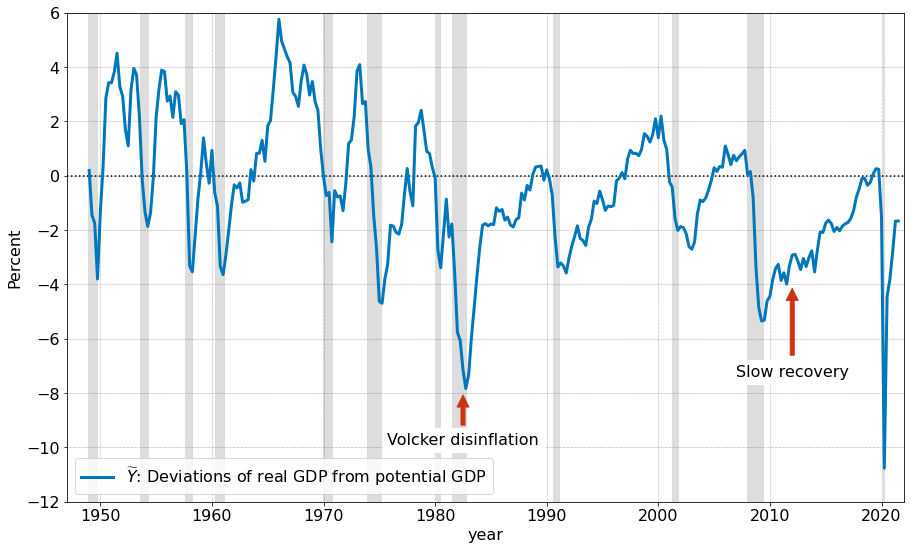

In [3]:
# short-run output since 1947
data = myLoadDataFRED(series=['GDPC1','GDPPOT'],transform='none')

# saving rate graph
param = {'title': '',
         'xlim': [1947,2022], 'ylim': [-12,6],
         'xlabel': 'year', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-12,6]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],(data['GDPC1']/data['GDPPOT']-1)*100,
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='$\\widetilde{Y}$: Deviations of real GDP from potential GDP')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed'], shrink=0.05))

ax.annotate('Volcker disinflation',
            xy=(1982.5,-8),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(1982.5,-10), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.annotate('Slow recovery',
            xy=(2012,-4),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2012,-7.5), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.legend(loc='lower left')

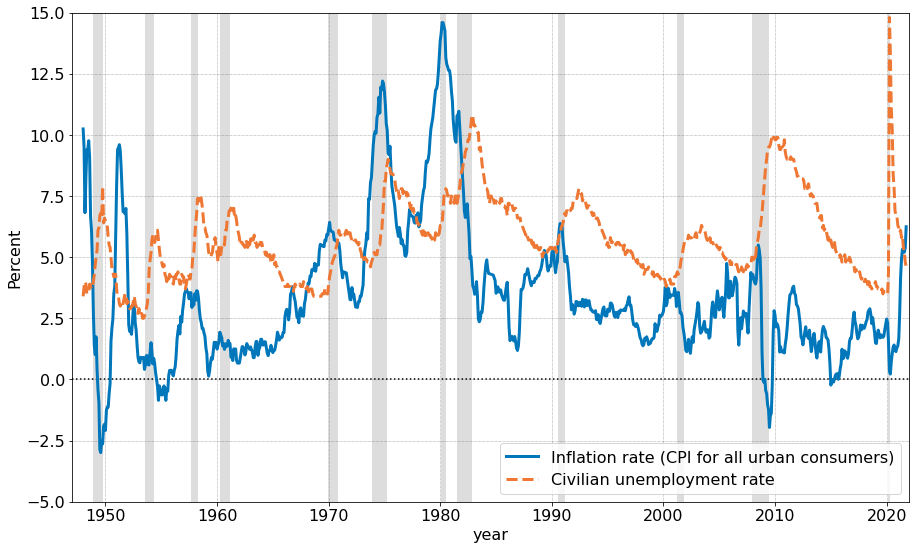

In [4]:
# inflation and unemployment
data_pi = myLoadDataFRED(series=['CPIAUCSL'],transform='pct_change_year_ago')
data_u = myLoadDataFRED(series=['UNRATE'],transform='none')

# saving rate graph
param = {'title': '',
         'xlim': [1947,2022], 'ylim': [-5,15],
         'xlabel': 'year', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-5,15]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data_pi['year'],data_pi['CPIAUCSL'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Inflation rate (CPI for all urban consumers)')

ax.plot(data_u['year'],data_u['UNRATE'],
                    '--',linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Civilian unemployment rate')

ax.legend(loc='lower right')



# Phillips curve and Okun's law

Data for period 1960-2020.0.
Slope coefficient in the regression of Delta pi on Ytilde 0.35572599290523244.
Slope coefficient in the regression of u-ubar pi on Ytilde -0.6396240740692589.


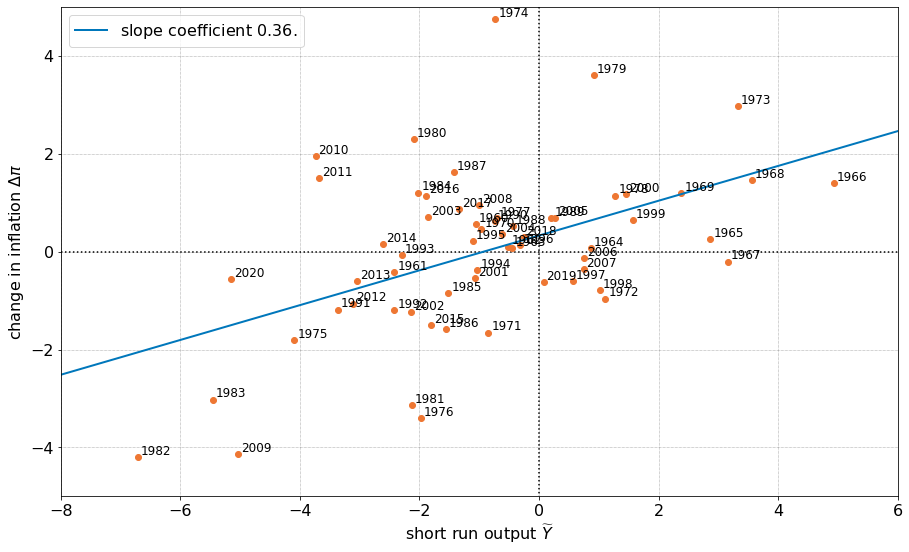

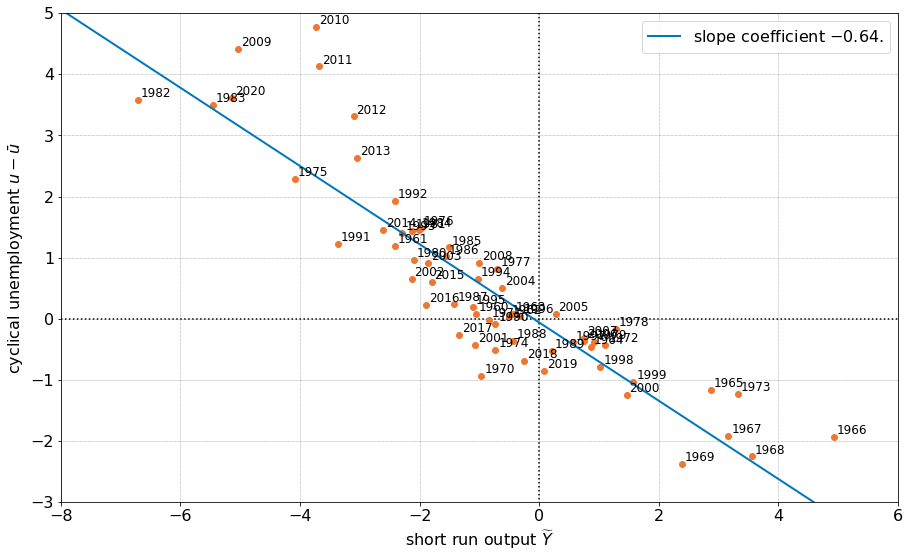

In [5]:
# inflation and unemployment
data_pi = myLoadDataFRED(series=['CPIAUCSL'],transform='pct_change_year_ago')
# short-run output since 1947
data_y = myLoadDataFRED(series=['GDPC1','GDPPOT'],transform='none')
# unemployment rate and noncyclical rate of unemployment
data_u = myLoadDataFRED(series=['UNRATE'],transform='none')
data_nrou = myLoadDataFRED(series=['NROU'],transform='none')

import math

# annual inflation
i = 0
while abs(data_pi['year'][i]-math.floor(data_pi['year'][i])) > 0.01:
    i = i + 1
pi_year = (data_pi['year'][i+12::12]-0.5).round()-1
#pi_values = data_pi['CPIAUCSL'][i+12::12]
pi_values = data_pi['CPIAUCSL'][i:i+12*len(pi_year)]
pi_values = sum(pi_values.reshape((len(pi_year),12)).transpose())/12
# change in inflation is difference in AVERAGE inflation in each year
dpi_year = pi_year[1:]
dpi_values = np.diff(pi_values)

# average annual GDP and potential GDP
i = 0
while abs(data_y['year'][i]-math.floor(data_y['year'][i])) > 0.01:
    i = i + 1
y_year = (data_y['year'][i+3::4]-0.5).round()
y_values = data_y['GDPC1'][i:i+4*len(y_year)]
y_values = sum(y_values.reshape((len(y_year),4)).transpose())/4
ypot_values = data_y['GDPPOT'][i:i+4*len(y_year)]
ypot_values = sum(ypot_values.reshape((len(y_year),4)).transpose())/4
ytilde_values = (y_values-ypot_values)/ypot_values*100

# average unemployment rate
i = 0
while abs(data_u['year'][i]-math.floor(data_u['year'][i])) > 0.01:
    i = i + 1
u_year = (data_u['year'][i+11::12]-0.5).round()
u_values = data_u['UNRATE'][i:i+12*len(u_year)]
u_values = sum(u_values.reshape((len(u_year),12)).transpose())/12

# average noncyclical rate of unemployment
i = 0
while abs(data_nrou['year'][i]-math.floor(data_nrou['year'][i])) > 0.01:
    i = i + 1
nrou_year = (data_nrou['year'][i+3::4]-0.5).round()
nrou_values = data_nrou['NROU'][i:i+4*len(nrou_year)]
nrou_values = sum(nrou_values.reshape((len(nrou_year),4)).transpose())/4

year_min = max(y_year[0],pi_year[0],1960) # possible starting from 1949
year_max = min(y_year[-1],pi_year[-1],2100)

# ----------------------------------------------------------------------------------
# run regression of changes in inflation on output gap
plot_x = ytilde_values[np.logical_and(y_year>=year_min,y_year<=year_max)]
plot_y = dpi_values[np.logical_and(dpi_year>=year_min,dpi_year<=year_max)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(plot_x.reshape(-1,1),plot_y.reshape(-1,1))
x_pred = [[-8],[6]]
y_pred = lreg.predict(x_pred)
print(f'Data for period {year_min}-{year_max}.')
print(f'Slope coefficient in the regression of Delta pi on Ytilde {lreg.coef_[0][0]}.')

# plot the graph
param = {'title': '',
         'xlim': [-8,6], 'ylim': [-5,5],
         'xlabel': 'short run output $\\widetilde{Y}$', 'ylabel': 'change in inflation $\\Delta\pi$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-5,15]}

fig,ax = myGenerateTSPlot(param)

ax.plot(plot_x,plot_y,'',linewidth=0,marker='o',color=myColor['tolVibrantOrange'])
ax.plot([0,0],[-10,10],':',linewidth=1.5,marker='',color=myColor['tolHighContrastBlack'])

style = dict(fontsize=12)

for i,txt in enumerate(y_year[np.logical_and(y_year>=year_min,y_year<=year_max)]):
    ax.annotate(round(txt),xy=(plot_x[i]+0.05,plot_y[i]+0.05),**style)
    
ax.plot(x_pred,y_pred,color=myColor['tolVibrantBlue'],linewidth=2,
        label=f'slope coefficient ${round(lreg.coef_[0][0],2)}$.')
ax.legend(loc='upper left')

# ----------------------------------------------------------------------------------
# run regression of cyclical unemployment on output gap
plot_x = ytilde_values[np.logical_and(y_year>=year_min,y_year<=year_max)]
plot_y = u_values[np.logical_and(u_year>=year_min,u_year<=year_max)] - nrou_values[np.logical_and(nrou_year>=year_min,nrou_year<=year_max)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(plot_x.reshape(-1,1),plot_y.reshape(-1,1))
x_pred = [[-8],[6]]
y_pred = lreg.predict(x_pred)
print(f'Slope coefficient in the regression of u-ubar pi on Ytilde {lreg.coef_[0][0]}.')

# plot the graph
param = {'title': '',
         'xlim': [-8,6], 'ylim': [-3,5],
         'xlabel': 'short run output $\\widetilde{Y}$', 'ylabel': 'cyclical unemployment $u - \\bar{u}$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-5,15]}

fig,ax = myGenerateTSPlot(param)

ax.plot(plot_x,plot_y,'',linewidth=0,marker='o',color=myColor['tolVibrantOrange'])
ax.plot([0,0],[-10,10],':',linewidth=1.5,marker='',color=myColor['tolHighContrastBlack'])

for i,txt in enumerate(y_year[np.logical_and(y_year>=year_min,y_year<=year_max)]):
    ax.annotate(round(txt),xy=(plot_x[i]+0.05,plot_y[i]+0.05),**style)
    
ax.plot(x_pred,y_pred,color=myColor['tolVibrantBlue'],linewidth=2,
        label=f'slope coefficient ${round(lreg.coef_[0][0],2)}$.')
ax.legend(loc='upper right')